# Human Activity Recognition

# Background

### Problem Statement

The project is aimed to build a predictor model that predicts human activities such as Walking, Walking Upstairs, Walking Downstairs, Sitting, Standing or Laying ( 6 class classification) using the Smartphone data.

For this problem in hand, the dataset was collected from 30 subjects within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz were captured. The experiments have been video-recorded to label the data manually.

### Features

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In the dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean.
	+ tBodyGyroJerkMean.

   
### Label

+ In the dataset the Y_labels are represented as numbers from 1 to 6 as their encodings.
    - WALKING = __1__
    - WALKING_UPSTAIRS = __2__
    - WALKING_DOWNSTAIRS = __3__
    - SITTING = __4__
    - STANDING = __5__
    - LAYING = __6__

<i>Note: The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___ <i>

## Objective  and Problem Framework

<i>__The main objective is given a new datapoint i.e. triaxial gyroscope and triaxial accelrometer reading of a person the model must predict the activity the he/she is performing.__<i>

__1)__ . 30 subjects data is randomly split into 70% (i.e 21 subjects' data) train data and 30%(i.e. 9 subjects' data) test data.
<br>
__2)__ . This is a 6 class classification Problem ( 6 human activities)

## Import Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
import os
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing features from file features.txt
features = list()
with open('HAR/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('Number of features: {}'.format(len(features)))

Number of features: 561


### Train Data

In [22]:
#loading the data from text files to pandas dataframe
X_train = pd.read_csv('HAR/UCI_HAR_dataset/train/X_train.txt',delim_whitespace=True,header=None)

X_train.columns = features

#add subject column to the dataframe
X_train['subject'] = pd.read_csv('HAR/UCI_HAR_dataset/train/subject_train.txt',header=None,squeeze=True)

y_train = pd.read_csv('HAR/UCI_HAR_dataset/train/y_train.txt', names = ["Activity"],squeeze=True)

y_train_labels = y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:"SITTING",5:'STANDING',6:"LAYING"})


train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
22,0.275676,-0.021264,-0.110801,-0.997862,-0.990091,-0.994593,-0.998333,-0.989473,-0.994485,-0.944567,...,-0.032337,-0.301298,0.132576,-0.022379,-0.761509,0.26255,0.029639,1,5,STANDING


In [23]:
train.shape

(7352, 564)

### Test Data

In [24]:
X_test = pd.read_csv('HAR/UCI_HAR_dataset/test/X_test.txt',delim_whitespace=True,header = None)
X_test.columns = features

X_test['subject'] = pd.read_csv('HAR/UCI_HAR_dataset/test/subject_test.txt',header=None,squeeze=True)

y_test = pd.read_csv('HAR/UCI_HAR_dataset/test/y_test.txt', names=['Activity'],squeeze=True)
y_test_labels = y_test.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})


test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
374,0.283695,-0.017367,-0.113113,-0.98741,-0.990953,-0.976705,-0.988193,-0.990285,-0.979274,-0.930215,...,0.253794,0.843275,0.074422,-0.082865,0.567953,-0.69085,-0.308228,4,6,LAYING


In [25]:
test.shape

(2947, 564)

## Data Cleaning

In [26]:
# Checking for duplicaets

print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(train.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [27]:
# Checking Nan/Null values

print('We have {} Nan/Null values in train'.format(train.isnull().values.sum()))
print('We have {} Nan/Null values in test'.format(test.isnull().values.sum()))

We have 0 Nan/Null values in train
We have 0 Nan/Null values in test


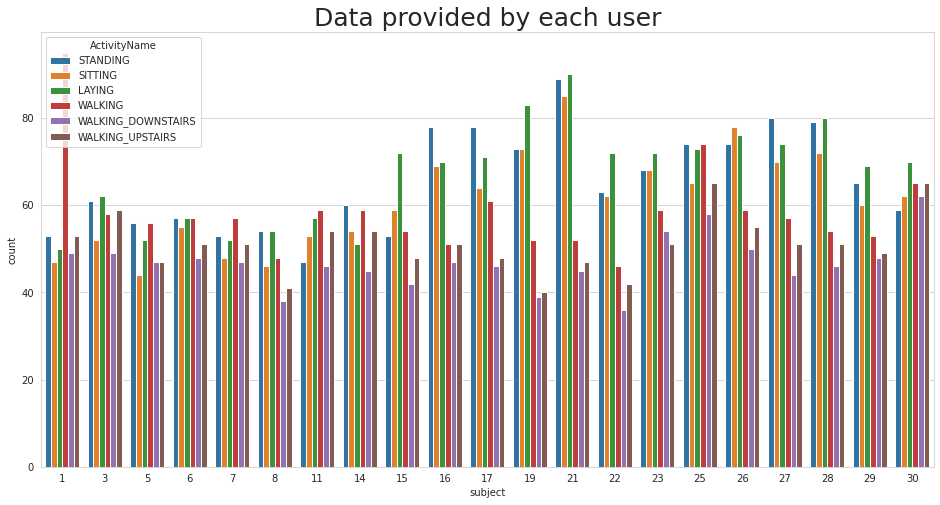

In [28]:
# Checking for data imbalance

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize = 25)
sns.countplot(x='subject',hue='ActivityName',data=train)
plt.show()

> __Observation:__ The data seems to be balanced for each subject

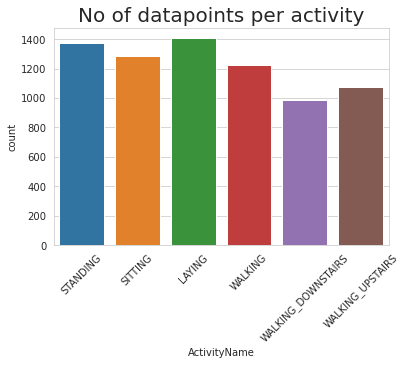

In [29]:
plt.title('No of datapoints per activity', fontsize = 20)
sns.countplot(train.ActivityName)
plt.xticks(rotation=45)
plt.show()

> __Observation:__ The data seems to be well balanced

In [30]:
#The columns seem to contain special characters , so need to remove them

columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## Saving this processed dataframe into a csv file

In [101]:
train.to_csv('HAR_Proj/csv_files/train.csv',index=False)
test.to_csv('HAR_proj/csv_files/test.csv',index=False)

# Exploratory Data Analysis

## 1.Feature Engineering from Domain Knowledge



+ __Static Activities vs Dynamic Activities__

    - In static activities viz, SITTING, STANDING and LAYING motion related information is not very useful
    - In dynamic/motion acitivities viz, WALKING, WALKING_UPSTAIRS,WALKING_DOWNSTAIRS motion related information is significant.


## 2.Plot a graph to show Static vs Dynamic Activities

C:\Users\vrajv\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


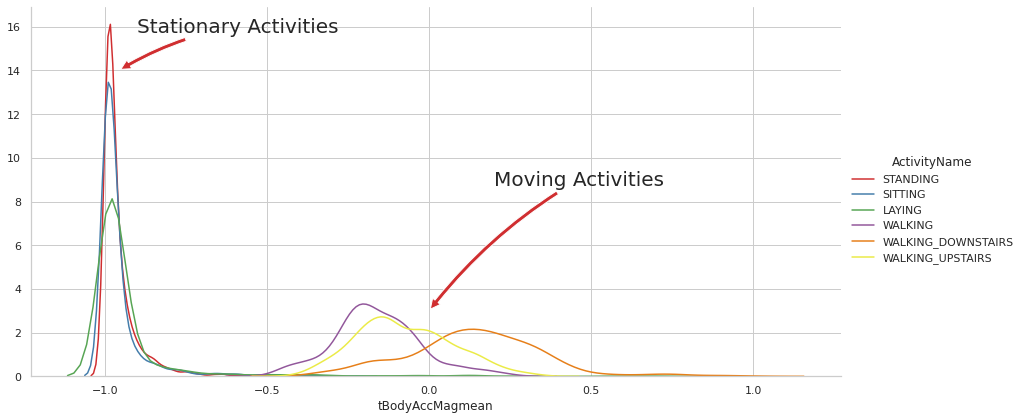

In [110]:
sns.set_palette("Set1",desat=0.80)
facetgrid = sns.FacetGrid(train, hue="ActivityName",size=6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate('Stationary Activities',xy=(-.956,14),xytext=(-0.9,16),size=20,\
            va='center', ha='left',arrowprops=dict(arrowstyle='simple',connectionstyle='arc3,rad=.1'))
plt.annotate("Moving Activities", xy=(0,3),xytext=(0.2,9),size=20,va='center',ha='left',arrowprops=dict(arrowstyle='simple',connectionstyle='arc3,rad=0.1'))
plt.show()

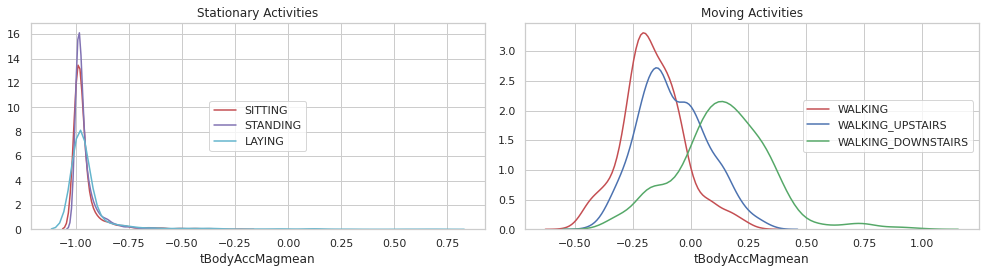

In [112]:
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title("Stationary Activities")
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False, label = 'SITTING')
sns.distplot(df5['tBodyAccMagmean'],color='m',hist=False,label='STANDING')
sns.distplot(df6['tBodyAccMagmean'],color='c',hist=False,label='LAYING')
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label = "WALKING")
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label='WALKING_UPSTAIRS')
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label='WALKING_DOWNSTAIRS')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

## 3.Magnitude of the acceleration is also a deciding number 

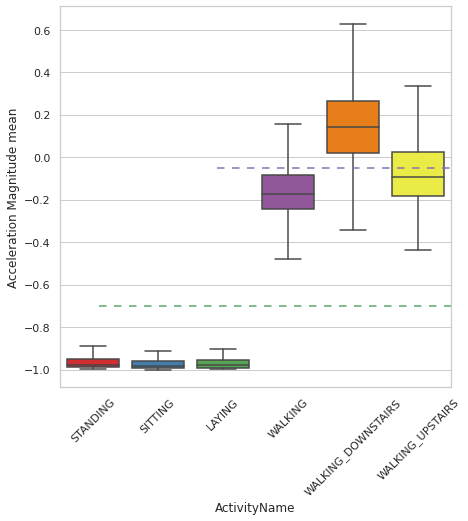

In [122]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName',y='tBodyAccMagmean',data=train,showfliers=False,saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7,xmin=0.1,dashes=(5,5),c='g')
plt.axhline(y=-0.05,xmin=0.4,dashes=(5,5),c='m')
plt.xticks(rotation = 45)
plt.show()


__Observations:__
    
+ Clearly, crude model could be
     - if tBodyAccMagmean < -0.8 then Activities are either SITTING,STANDING or LAYING.
     - if tBodyAccMagmean > -.6 then Activitis are either WALKING, WALKING_UPSTAIRS or WALKING_DOWNSTAIRS
     - if tBodyAccMagmean > 0.1 then the Activity is WALKING_DOWNSTAIRS
     - With the above model we can classify 75% activities with some errors
            


## 4. GravityAccelerationMean also an important feature

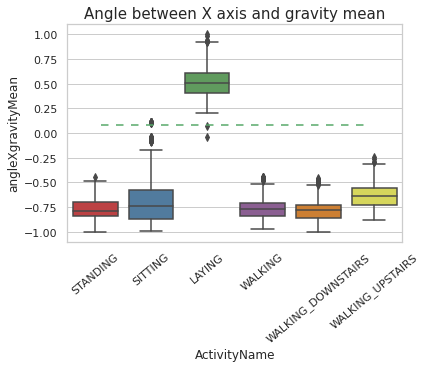

In [124]:
sns.boxplot(x='ActivityName',y='angleXgravityMean',data=train)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,dashes=(5,5),c='g')
plt.title('Angle between X axis and gravity mean',fontsize=15)
plt.xticks(rotation=40)
plt.show()

__Observations:__

   - if angleXgravityMean > 0 then Activity is LAYING.

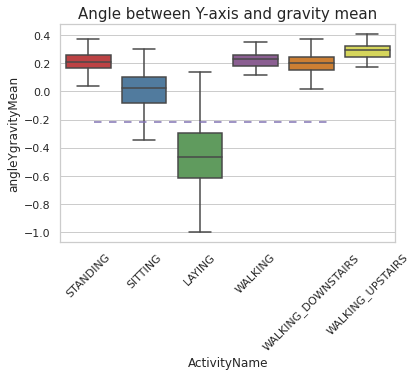

In [125]:
sns.boxplot(x='ActivityName',y='angleYgravityMean',data=train,showfliers=False)
plt.title('Angle between Y-axis and gravity mean', fontsize=15)
plt.xticks(rotation =45)
plt.axhline(y=-.22, xmin=0.1,xmax=0.8,dashes=(5,5),c='m')
plt.show()

__Observations:__

  - if angleYgravityMean < -0.2 then Activity is LAYING.


# Applying t-SNE on the data

In [13]:
from sklearn.manifold import TSNE

In [14]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000,img_name_prefix='t-sne'):
    for index,perplexity in enumerate(perplexities):
        print('\nPerforming t-SNE with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2,perplexity=perplexity).fit_transform(X_data)
        print('Completed....')
        
        #data for plotting in seaborn
        print('t-SNE Visualization....')
        df = pd.DataFrame({'x':X_reduced[:,0],'y':X_reduced[:,1],'label':y_data})
        
        sns.lmplot(data=df,x='x',y='y',hue='label',fit_reg=False,size=8,palette='Set1',markers=['^','v','s','o','1','2'])
        plt.title('Perplexity: {} and max_iter: {}'.format(perplexity,n_iter))
        
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity,n_iter)
        print('Saving this plot as image in the current directory..')
        plt.savefig(img_name)
        plt.show()
        print('Completed')


Performing t-SNE with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.817s...
[t-SNE] Computed neighbors for 7352 samples in 73.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 124.7587967, gradient norm = 0.0296370 (50 iterations in 3.788s)
[t-SNE] Iteration 100: error = 107.1950607, gradient norm = 0.0254449 (50 iterations i

C:\Users\vrajv\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Saving this plot as image in the current directory..


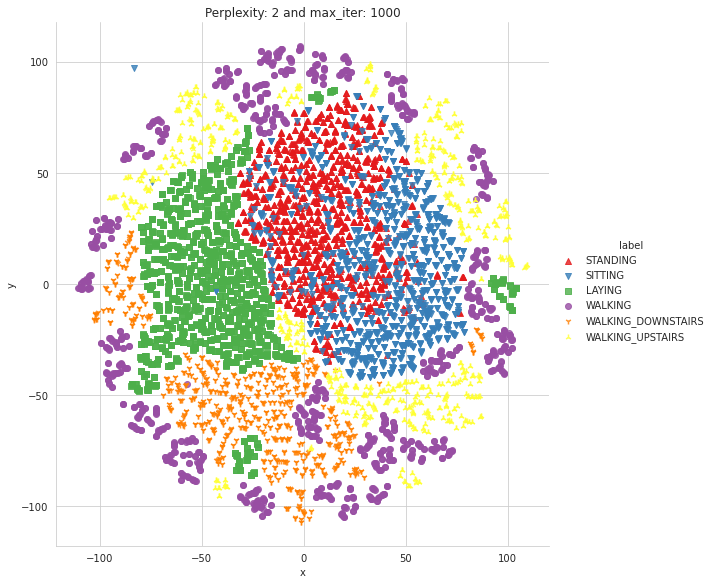

Completed

Performing t-SNE with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.819s...
[t-SNE] Computed neighbors for 7352 samples in 74.628s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.104s
[t-SNE] Iteration 50: error = 114.1892929, gradient norm = 0.0218378 (50 iterations in 6.460s)
[t-SNE] Iteration 100: error = 97.4902802, gradient norm = 0.0149830 (50 it

C:\Users\vrajv\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Saving this plot as image in the current directory..


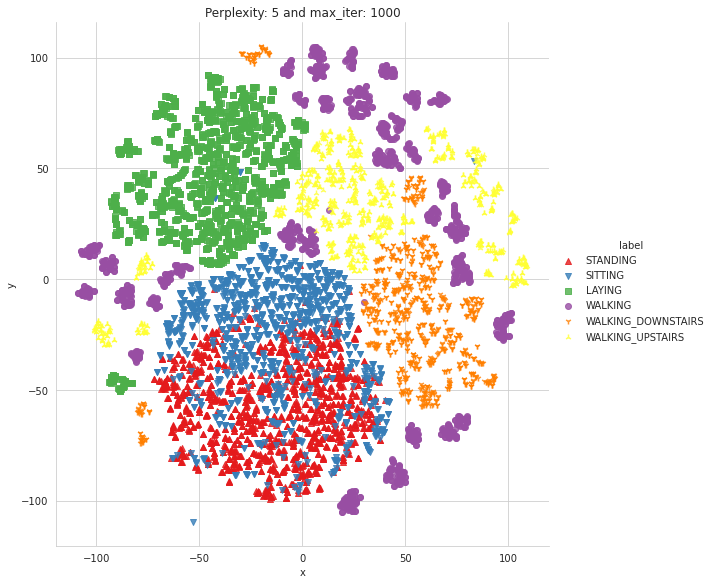

Completed

Performing t-SNE with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.798s...
[t-SNE] Computed neighbors for 7352 samples in 76.715s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.191s
[t-SNE] Iteration 50: error = 106.0298615, gradient norm = 0.0169385 (50 iterations in 4.312s)
[t-SNE] Iteration 100: error = 90.3608246, gradient norm = 0.0120733 (50 i

C:\Users\vrajv\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Saving this plot as image in the current directory..


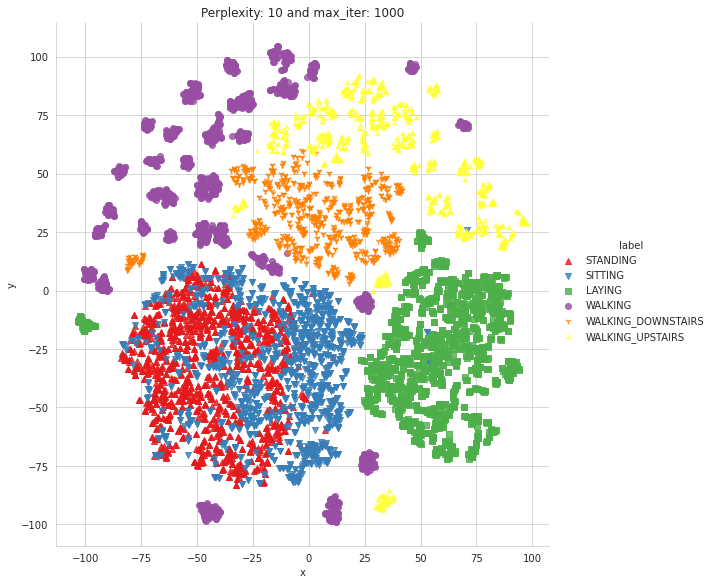

Completed

Performing t-SNE with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.806s...
[t-SNE] Computed neighbors for 7352 samples in 78.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.372s
[t-SNE] Iteration 50: error = 97.4398270, gradient norm = 0.0207047 (50 iterations in 4.368s)
[t-SNE] Iteration 100: error = 84.0196228, gradient norm = 0.0060636 (50 it

C:\Users\vrajv\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Saving this plot as image in the current directory..


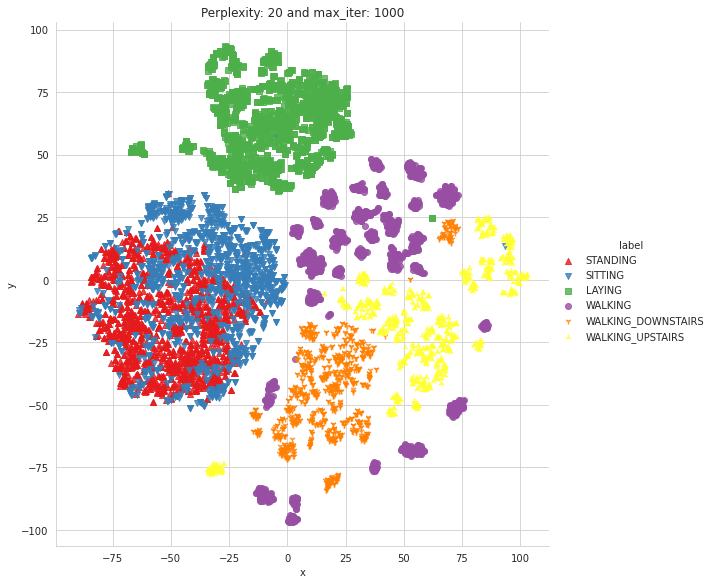

Completed

Performing t-SNE with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.799s...
[t-SNE] Computed neighbors for 7352 samples in 81.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.939s
[t-SNE] Iteration 50: error = 84.7785568, gradient norm = 0.0350718 (50 iterations in 5.840s)
[t-SNE] Iteration 100: error = 75.6276093, gradient norm = 0.0044175 (50 i

C:\Users\vrajv\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Saving this plot as image in the current directory..


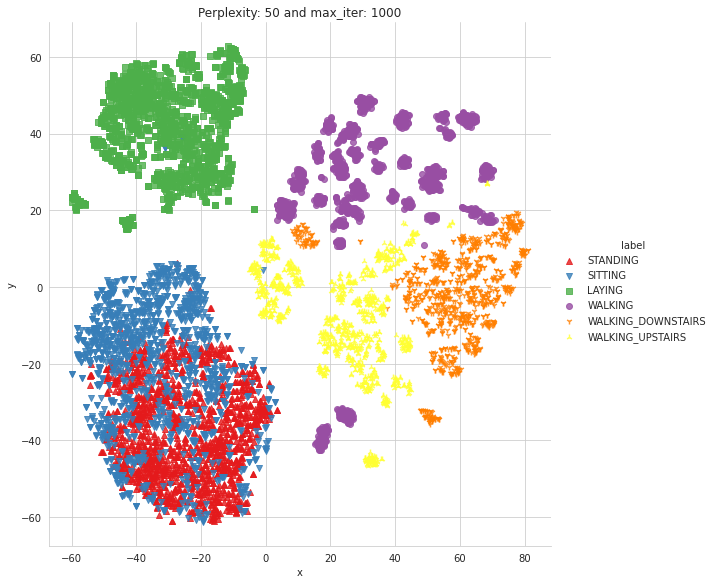

Completed


In [15]:
X_pre_tsne = train.drop(['subject','Activity','ActivityName'],axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne,perplexities=[2,5,10,20,50])

## Classical Machine Learning Models

### Load the train and test data

In [3]:
train = pd.read_csv('HAR_Proj/csv_files/train.csv')
test = pd.read_csv('HAR_Proj/csv_files/test.csv')

print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [4]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [5]:
#processing the train to drop the subject, activity and activity name columns
X_train = train.drop(['subject','Activity','ActivityName'],axis=1)
y_train = train.ActivityName

In [6]:
#processing the test to drop the subject, activity and activity name columns
X_test = test.drop(['subject','Activity','ActivityName'],axis=1)
y_test = test.ActivityName

In [7]:
print('X_train and y_train   :  ({},{})'.format(X_train.shape,y_train.shape))
print('X_test and y_test     :  ({},{})'.format(X_test.shape,y_test.shape))

X_train and y_train   :  ((7352, 561),(7352,))
X_test and y_test     :  ((2947, 561),(2947,))


In [8]:
labels = ['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Util functions

#### a) Function to plot confusion matrix

In [9]:
import itertools
from sklearn.metrics import confusion_matrix
plt.rcParams['font.family'] = 'DejaVu Sans'

def plot_confusion_matrix(cm,classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks, classes)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### b) Function to run any model

In [10]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True,print_cm=True,cm_cmap=plt.cm.Greens):
    # dictionary that stores results at various phases
    results = dict()
    
    train_start_time = datetime.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Done \n\n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('training_time(HH:MM:SS:ms)-{}\n\n'.format(results['training_time']))
    
    
    #predict on the test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done\n\n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    #computing overall accuracy
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    print('------------------------')
    print('|        Accuracy       |')
    print('------------------------')
    print('\n          {}\n\n'.format(accuracy))
    
    
    #Confusion matrix
    cm = metrics.confusion_matrix(y_test,y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('---------------------')
        print('|  Confusion Matrix |')
        print('---------------------')
        print('\n {}'.format(cm))

    #plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm,classes=class_labels,normalize=True,title='Noramlized Confusion Matrix', cmap= cm_cmap)
    plt.show()
    
    #classification report
    print('-------------------------')
    print('|  Classification Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test,y_pred)
    
    results['classification_report'] = classification_report
    print(classification_report)
    
    results['model'] = model
    
    return results

#### c) Function to print gridsearch Attributes

In [11]:
def print_grid_search_attributes(model):
    print('---------------------------')
    print('|      Best Estimator      |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    print('---------------------------')
    print('|      Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator :  \n\n\t{}\n'.format(model.best_params_))
    
    print('---------------------------')
    print('|      No of CrossValidation sets    |')
    print('---------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))
    
    #Average cross validated score of the best estimator, from the Grid Search
    print('---------------------------')
    print('|      Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    

## 1. Logistic Regression with Grid Search

In [12]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:    4.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.6s finished


Done 


training_time(HH:MM:SS:ms)-0:00:12.062564


Predicting test data
Done


testing time(HH:MM:SS:ms) - 0:00:00.009977


------------------------
|        Accuracy       |
------------------------

          0.9582626399728538


---------------------
|  Confusion Matrix |
---------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


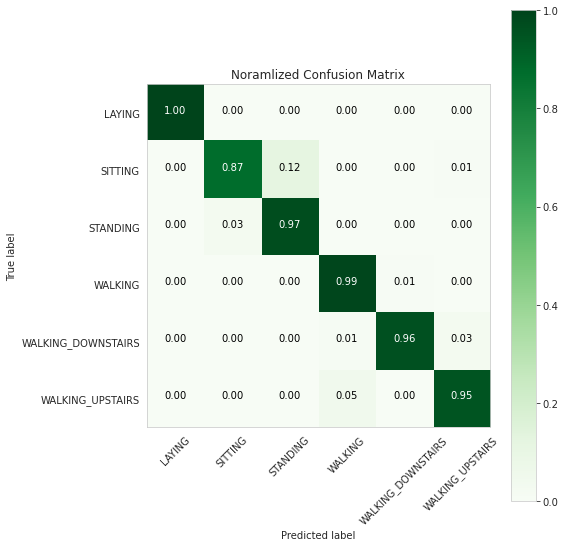

-------------------------
|  Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [21]:
parameters = {'C':[0.01,0.1,1,10,20,30],'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters,cv=3,verbose=1,n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid,X_train,y_train,X_test,y_test,class_labels=labels)

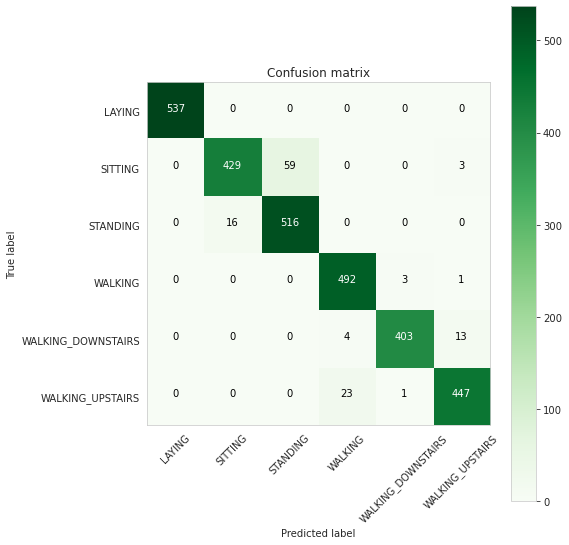

In [22]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [23]:
#printing attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

---------------------------
|      Best Estimator      |
---------------------------

	LogisticRegression(C=1)

---------------------------
|      Best parameters     |
---------------------------
	Parameters of best estimator :  

	{'C': 1, 'penalty': 'l2'}

---------------------------
|      No of CrossValidation sets    |
---------------------------

	Total number of cross validation sets: 3

---------------------------
|      Best Score       |
---------------------------

	Average Cross validate scores of best estimator : 

	0.9374335617559958



## 2. Linear SVC with GridSearch

In [36]:
from sklearn.svm import LinearSVC

Training the model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.9s finished


Done 


training_time(HH:MM:SS:ms)-0:00:58.299037


Predicting test data
Done


testing time(HH:MM:SS:ms) - 0:00:00.017193


------------------------
|        Accuracy       |
------------------------

          0.9667458432304038


---------------------
|  Confusion Matrix |
---------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


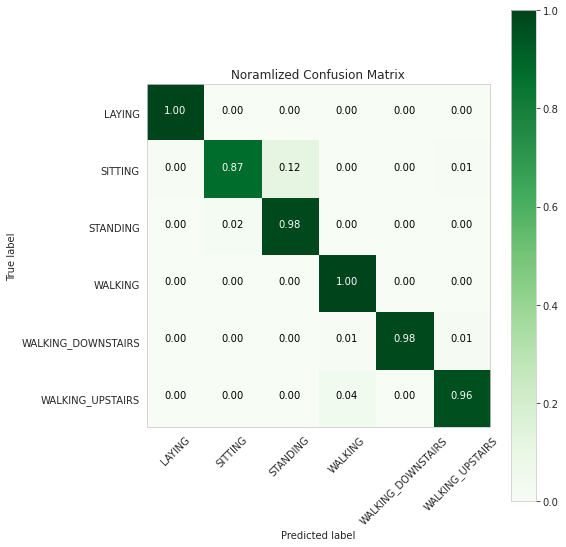

-------------------------
|  Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [37]:
parameters = {'C':[0.125,0.5,1,2,8,16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc,param_grid=parameters,n_jobs=-1,verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid,X_train,y_train,X_test,y_test,class_labels=labels)

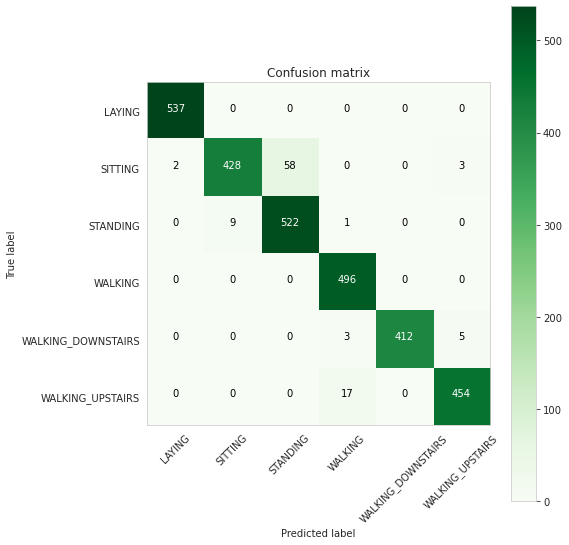

In [38]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [39]:
print_grid_search_attributes(lr_svc_grid_results['model'])

---------------------------
|      Best Estimator      |
---------------------------

	LinearSVC(C=0.5, tol=5e-05)

---------------------------
|      Best parameters     |
---------------------------
	Parameters of best estimator :  

	{'C': 0.5}

---------------------------
|      No of CrossValidation sets    |
---------------------------

	Total number of cross validation sets: 5

---------------------------
|      Best Score       |
---------------------------

	Average Cross validate scores of best estimator : 

	0.9424722873513783



## 3. Kernel SVM with Grid Search

Training the model...
Done 


training_time(HH:MM:SS:ms)-0:06:20.634134


Predicting test data
Done


testing time(HH:MM:SS:ms) - 0:00:01.958779


------------------------
|        Accuracy       |
------------------------

          0.9626739056667798


---------------------
|  Confusion Matrix |
---------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


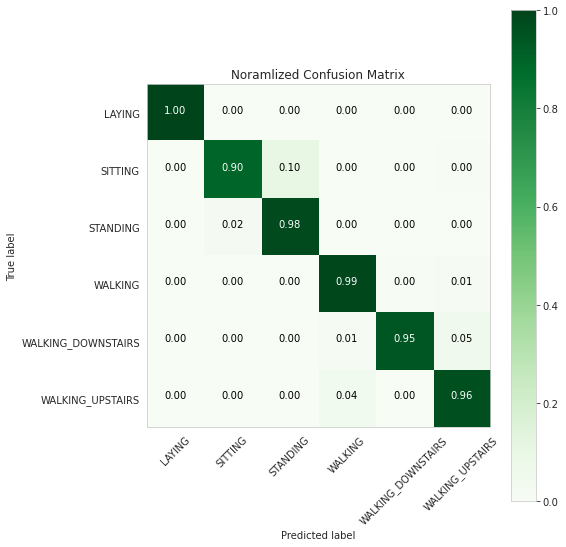

-------------------------
|  Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [28]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],'gamma':[0.0078125,0.125,2]}
rbf_svm = SVC(kernel = 'rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid,X_train,y_train,X_test,y_test,class_labels=labels)

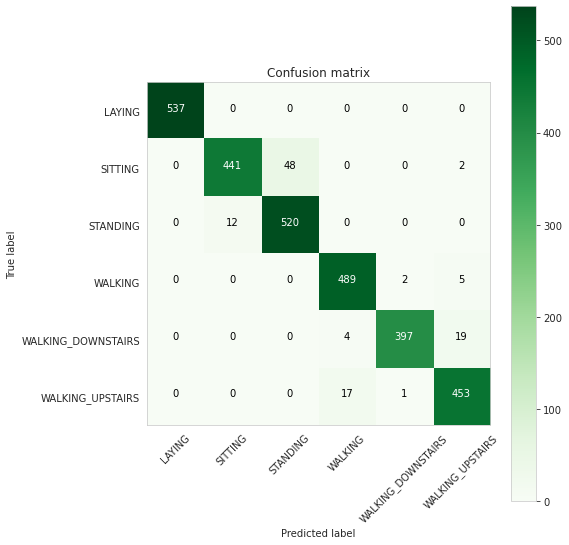

In [29]:

plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [30]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

---------------------------
|      Best Estimator      |
---------------------------

	SVC(C=16, gamma=0.0078125)

---------------------------
|      Best parameters     |
---------------------------
	Parameters of best estimator :  

	{'C': 16, 'gamma': 0.0078125}

---------------------------
|      No of CrossValidation sets    |
---------------------------

	Total number of cross validation sets: 5

---------------------------
|      Best Score       |
---------------------------

	Average Cross validate scores of best estimator : 

	0.9447834551903698



## 4. Decision Trees with GridSearchCV

Training the model...
Done 


training_time(HH:MM:SS:ms)-0:00:16.854578


Predicting test data
Done


testing time(HH:MM:SS:ms) - 0:00:00.017888


------------------------
|        Accuracy       |
------------------------

          0.8639294197488971


---------------------
|  Confusion Matrix |
---------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  14 345  61]
 [  0   0   0  73  29 369]]


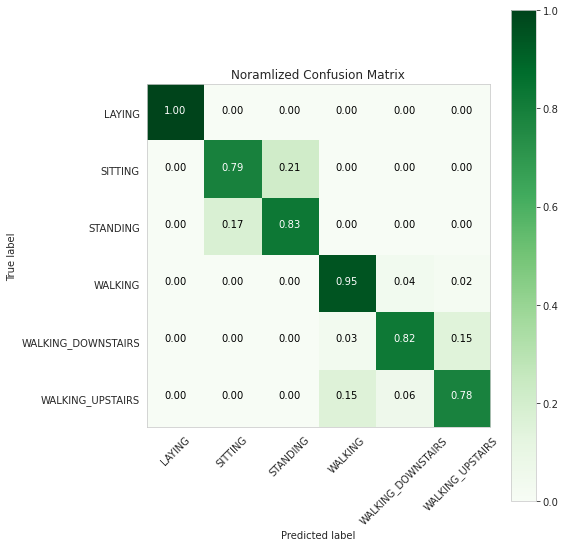

-------------------------
|  Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



In [15]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train,y_train,X_test, y_test,class_labels=labels)

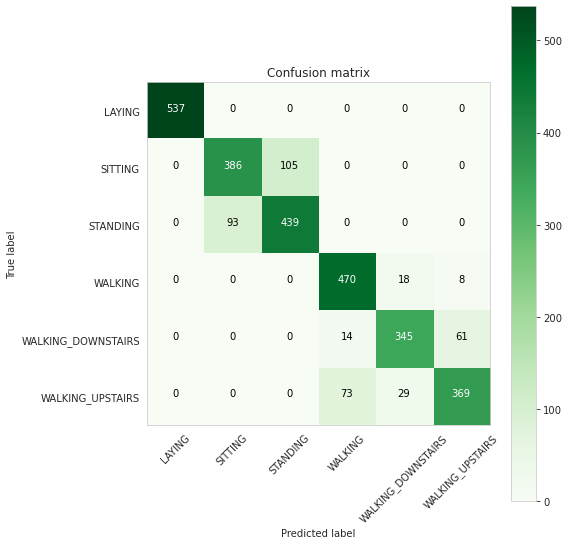

In [16]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [17]:
print_grid_search_attributes(dt_grid_results['model'])

---------------------------
|      Best Estimator      |
---------------------------

	DecisionTreeClassifier(max_depth=7)

---------------------------
|      Best parameters     |
---------------------------
	Parameters of best estimator :  

	{'max_depth': 7}

---------------------------
|      No of CrossValidation sets    |
---------------------------

	Total number of cross validation sets: 5

---------------------------
|      Best Score       |
---------------------------

	Average Cross validate scores of best estimator : 

	0.8495716274273135



## 5. Random Forest Classifier with GridSearch

Training the model...
Done 


training_time(HH:MM:SS:ms)-0:04:54.556766


Predicting test data
Done


testing time(HH:MM:SS:ms) - 0:00:00.045877


------------------------
|        Accuracy       |
------------------------

          0.9202578893790295


---------------------
|  Confusion Matrix |
---------------------

 [[537   0   0   0   0   0]
 [  0 425  66   0   0   0]
 [  0  45 487   0   0   0]
 [  0   0   0 486   6   4]
 [  0   0   0  19 357  44]
 [  0   0   0  44   7 420]]


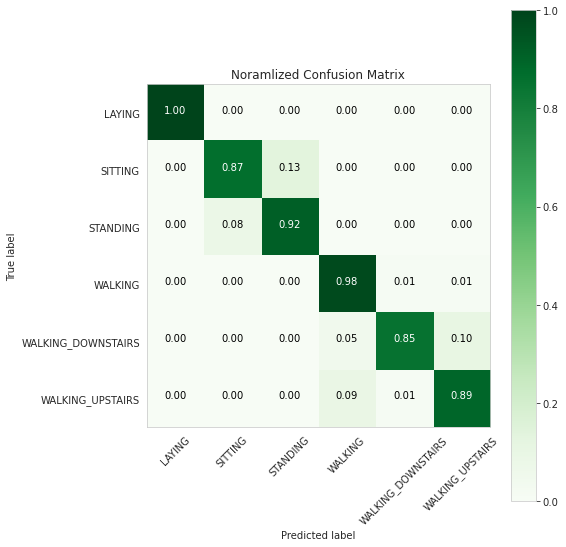

-------------------------
|  Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.87      0.88       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.89      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [18]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':np.arange(10,201,20),'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train,y_train,X_test,y_test,class_labels=labels)

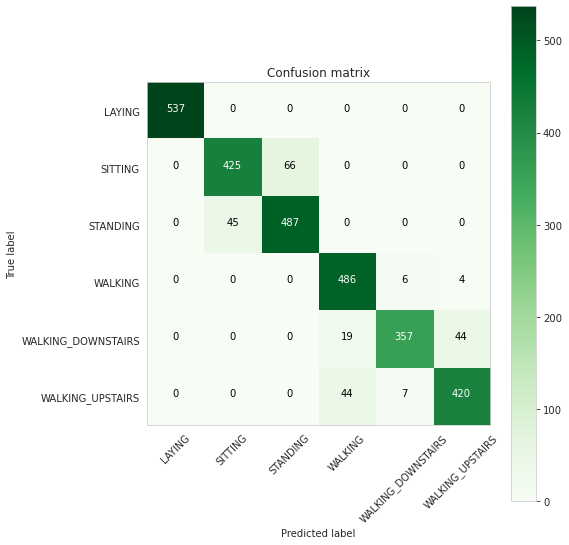

In [19]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [20]:
print_grid_search_attributes(rfc_grid_results['model'])

---------------------------
|      Best Estimator      |
---------------------------

	RandomForestClassifier(max_depth=13, n_estimators=110)

---------------------------
|      Best parameters     |
---------------------------
	Parameters of best estimator :  

	{'max_depth': 13, 'n_estimators': 110}

---------------------------
|      No of CrossValidation sets    |
---------------------------

	Total number of cross validation sets: 5

---------------------------
|      Best Score       |
---------------------------

	Average Cross validate scores of best estimator : 

	0.9205703001798952



## 6. Gradient Boosted Decision Trees with GridSearch

Training the model...
      Iter       Train Loss   Remaining Time 
         1        9960.6020           17.07m
         2        8002.4865           18.19m
         3        6598.0443           18.47m
         4        5520.8178           18.53m
         5        4663.9291           18.50m
         6        3972.4838           18.46m
         7        3396.6970           18.36m
         8        2914.2636           18.26m
         9        2517.8803           18.15m
        10        2180.1188           18.05m
        20         604.3095           16.76m
        30         217.0430           15.38m
        40          94.3768           14.00m
        50          48.9624           12.62m
        60          27.9316           11.22m
        70          17.1371            9.83m
        80          11.0268            8.43m
        90           7.4149            7.04m
       100           5.2609            5.64m
Done 


training_time(HH:MM:SS:ms)-8:32:44.380717


Predicting test data
Done

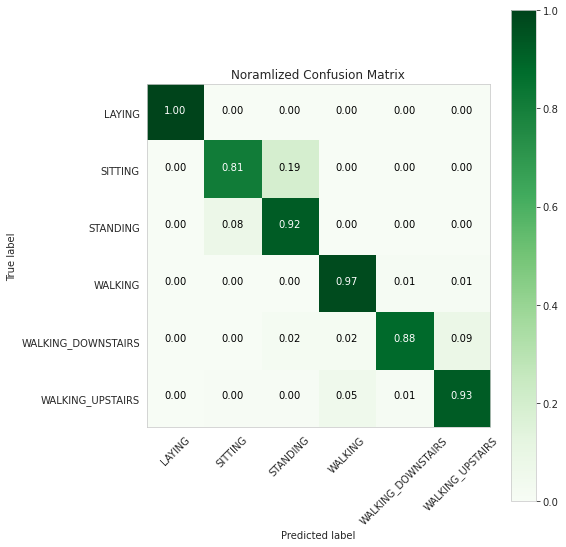

-------------------------
|  Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.81      0.85       491
          STANDING       0.83      0.92      0.87       532
           WALKING       0.94      0.97      0.96       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.91      0.93      0.92       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth':np.arange(5,8,1),'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier(verbose=1)
gbdt_grid = GridSearchCV(gbdt,param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test,class_labels=labels)


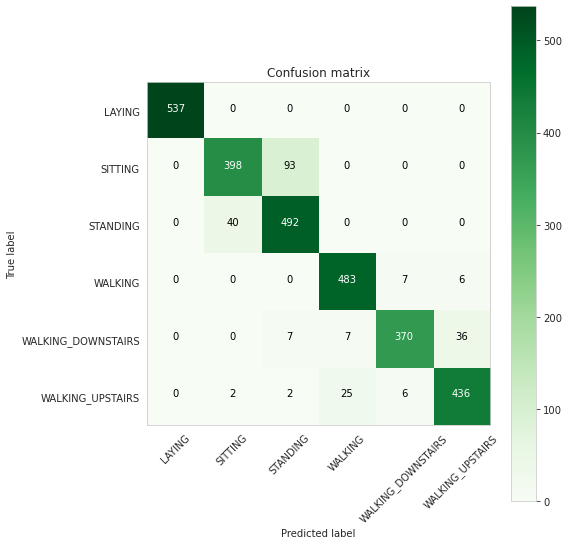

In [32]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [34]:
print_grid_search_attributes(gbdt_grid_results['model'])

---------------------------
|      Best Estimator      |
---------------------------

	GradientBoostingClassifier(max_depth=5, n_estimators=140, verbose=1)

---------------------------
|      Best parameters     |
---------------------------
	Parameters of best estimator :  

	{'max_depth': 5, 'n_estimators': 140}

---------------------------
|      No of CrossValidation sets    |
---------------------------

	Total number of cross validation sets: 5

---------------------------
|      Best Score       |
---------------------------

	Average Cross validate scores of best estimator : 

	0.9114550238858289



## Consolidated Results and Conclusion

In [43]:
print('\n                       Accuracy      Error')
print('                         --------      ------')
print('Logistic Regression  :   {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy']*100,100-(log_reg_grid_results['accuracy']*100)))
print('Linear SVC           :   {:.04}%       {:.04}%'.format(lr_svc_grid_results['accuracy']*100,100-(lr_svc_grid_results['accuracy']*100)))
print('RBF SVM Classifier   :   {:.04}%       {:.04}%'.format(rbf_svm_grid_results['accuracy']*100,100-(rbf_svm_grid_results['accuracy']*100)))
print('Decision Trees       :   {:.04}%       {:.04}%'.format(dt_grid_results['accuracy']*100,100-(dt_grid_results['accuracy']*100)))
print('Random Forest Dts    :   {:.04}%       {:.04}%'.format(rfc_grid_results['accuracy']*100,100-(rfc_grid_results['accuracy']*100)))
print('GradientBoosting Dts :   {:.04}%       {:.04}%'.format(gbdt_grid_results['accuracy']*100,100-(gbdt_grid_results['accuracy']*100)))


                       Accuracy      Error
                         --------      ------
Logistic Regression  :   95.83%       4.174%
Linear SVC           :   96.67%       3.325%
RBF SVM Classifier   :   96.27%       3.733%
Decision Trees       :   86.39%       13.61%
Random Forest Dts    :   92.03%       7.974%
GradientBoosting Dts :   92.16%       7.838%


> __Linear SVC , RBF SVM and Logistic Regression__ have higher accuracy and also lower training time

<i>Note: Becuase of domain knowledge, EDA and feature engineering the higher accuracy was achieved.<i>

## Deep Learning models

In [2]:
ACTIVITIES = {
    0:"WALKING",
    1:"WALKING_UPSTAIRS",
    2:"WALKING_DOWNSTAIRS",
    3:"SITTING",
    4:"STANDING",
    5:"LAYING"
}

# Util function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true,axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred,axis=1)])
    return pd.crosstab(Y_true,Y_pred,rownames=['True'],colnames=['Pred'])

In [3]:
# Importing raw signlas
#Triaxial signals i.e. along X, Y and Z direction.
#Accelration signals are further filtered so as to obtain body accelration and total accelration

SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [4]:
#Utility functions to read data from csv file

def _read_csv(filename):
    return pd.read_csv(filename,delim_whitespace=True,header=None)

def load_signals(subset):
    signals_data = []
    
    for signal in SIGNALS:
        filename = f'HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
                _read_csv(filename).to_numpy()
        )
        #print(signals_data.shape)
    return np.transpose(signals_data,(1, 2, 0))

In [5]:
def load_y(subset):
    """One hot encoding of the labels 0,1,2,3,4,5 classes"""

    filename = f'HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    return pd.get_dummies(y).to_numpy()

In [6]:
def load_data():
    """fucntion to obtain X_train,X_test,y_train,y_test"""
    
    X_train,X_test = load_signals('train'),load_signals('test')
    y_train,y_test = load_y('train'),load_y('test')
    
    return X_train, X_test, y_train, y_test

In [7]:
import tensorflow as tf

In [8]:
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [10]:
#Initializing parameters

epochs = 30
batch_size = 16
n_hidden = 32

In [11]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [12]:
X_train, X_test, Y_train, Y_test = load_data()

In [13]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
print(timesteps)
print(input_dim)
print(n_classes)

128
9
6


## Define LSTM Architecture

In [193]:
#Initializing the sequence model
model = Sequential()
#configure the paramters
model.add(LSTM(n_hidden,input_shape=(timesteps,input_dim)))
#Adding a dropout layer
model.add(Dropout(0.5))
#Adding a desne output layer with sigmoid activation
model.add(Dense(n_classes,activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 32)                5376      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [176]:
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [177]:
model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test,Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 74s 10ms/step - loss: 1.2989 - accuracy: 0.4493 - val_loss: 1.0887 - val_accuracy: 0.5253
Epoch 2/30
7352/7352 [==============================] - 69s 9ms/step - loss: 0.8942 - accuracy: 0.6141 - val_loss: 0.8385 - val_accuracy: 0.6155
Epoch 3/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.7423 - accuracy: 0.6564 - val_loss: 0.8118 - val_accuracy: 0.6108
Epoch 4/30
7352/7352 [==============================] - 70s 9ms/step - loss: 0.6866 - accuracy: 0.6753 - val_loss: 0.8371 - val_accuracy: 0.6298
Epoch 5/30
7352/7352 [==============================] - 69s 9ms/step - loss: 0.6252 - accuracy: 0.7150 - val_loss: 0.6498 - val_accuracy: 0.7421
Epoch 6/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.5427 - accuracy: 0.7741 - val_loss: 0.6423 - val_accuracy: 0.7557
Epoch 7/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.5

In [179]:
print(confusion_matrix(Y_test,model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 509        1         0        0                   0   
SITTING                  0      387       101        2                   0   
STANDING                 0       85       446        1                   0   
WALKING                  0        0         0      452                  43   
WALKING_DOWNSTAIRS       0        0         0        2                 413   
WALKING_UPSTAIRS         0        0         0        4                  42   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            1  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 425  


In [180]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 1s 487us/step


In [181]:
score

[0.47904674155449867, 0.8931116461753845]

>__Observations:__
        - The test accuracy is 89.311,it is bit less when compared to train accuracy which is 94.50%
        - The model is overfitting, further hyperparameter tuning is needed

## Hyper Parameter Tuning to improve the Accuracy 

Below are the hyperparameters that can be tuned

+ Number of LSTM units
+ Dropout rate.
    - Lower drop out rate in input layer i.e. 0.2 as we need to retain much of information
    - Higher drop out rate in the hidden layers i.e. 0.5 as to avoid overfitting
        
+ Adding one more LSTM layer
+ Adding additional Fully Connected layers
+ Changing the activation to softmax
+ Using Bidirectional LSTM

In [348]:
model = Sequential()

model.add(LSTM(16,input_shape=(timesteps,input_dim)))
#Adding a dropout of 02 as to retain more information
model.add(Dropout(0.2))
model.add(Dense(32))
#Adding a dropout with bit higher value 0.5
model.add(Dropout(0.4))
#Adding a fully connected layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_105 (LSTM)              (None, 16)                1664      
_________________________________________________________________
dropout_108 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_109 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 6)                 198       
Total params: 2,406
Trainable params: 2,406
Non-trainable params: 0
_________________________________________________________________


In [274]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [350]:
history = model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test,Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 69s 9ms/step - loss: 1.2430 - accuracy: 0.4694 - val_loss: 1.0048 - val_accuracy: 0.5667
Epoch 2/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.8009 - accuracy: 0.6353 - val_loss: 0.7285 - val_accuracy: 0.6654
Epoch 3/30
7352/7352 [==============================] - 75s 10ms/step - loss: 0.6586 - accuracy: 0.6919 - val_loss: 0.7286 - val_accuracy: 0.6956
Epoch 4/30
7352/7352 [==============================] - 78s 11ms/step - loss: 0.5897 - accuracy: 0.7450 - val_loss: 0.6843 - val_accuracy: 0.7594
Epoch 5/30
7352/7352 [==============================] - 77s 10ms/step - loss: 0.4817 - accuracy: 0.8175 - val_loss: 0.5328 - val_accuracy: 0.8517
Epoch 6/30
7352/7352 [==============================] - 78s 11ms/step - loss: 0.4014 - accuracy: 0.8664 - val_loss: 0.4499 - val_accuracy: 0.8629
Epoch 7/30
7352/7352 [==============================] - 82s 11ms/step - loss: 

> There is no much increase in accuracy 

## Trying one more model with different set of hyperparameters

In [262]:
from keras.layers import Bidirectional

In [273]:
#Initializing the new 
model = Sequential()

#I'm using Biderectional LSTM, main reason is that it could differential standing , Walking , walking_upstairs and walking_downstairs more efficiently
model.add(Bidirectional(LSTM(32,return_sequences=True),input_shape=(timesteps,input_dim)))
#Adding a dropout of 02 as to retain more information 
model.add(Dropout(0.2))

#Adding one more LSTM
model.add(LSTM(16))
#Adding a dropout with bit higher value 0.5
model.add(Dropout(0.5))

# Adding a fully connected layer wwith relu
model.add(Dense(32, activation='relu'))
#Adding a fully connected layer with softmax activation
model.add(Dense(n_classes, activation='softmax'))


In [349]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [275]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_25 (Bidirectio (None, 128, 64)           10752     
_________________________________________________________________
dropout_60 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dropout_61 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_56 (Dense)             (None, 6)                 198       
Total params: 16,678
Trainable params: 16,678
Non-trainable params: 0
_________________________________________________

In [276]:
model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test,Y_test),epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 108s 15ms/step - loss: 1.1631 - accuracy: 0.5031 - val_loss: 0.7950 - val_accuracy: 0.6495
Epoch 2/30
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7020 - accuracy: 0.6819 - val_loss: 0.6947 - val_accuracy: 0.6905
Epoch 3/30
7352/7352 [==============================] - 103s 14ms/step - loss: 0.5160 - accuracy: 0.8043 - val_loss: 0.6191 - val_accuracy: 0.7947
Epoch 4/30
7352/7352 [==============================] - 102s 14ms/step - loss: 0.4673 - accuracy: 0.8308 - val_loss: 0.5487 - val_accuracy: 0.8514
Epoch 5/30
7352/7352 [==============================] - 102s 14ms/step - loss: 0.3167 - accuracy: 0.8932 - val_loss: 0.5228 - val_accuracy: 0.8649
Epoch 6/30
7352/7352 [==============================] - 103s 14ms/step - loss: 0.2762 - accuracy: 0.9049 - val_loss: 0.5464 - val_accuracy: 0.8687
Epoch 7/30
7352/7352 [==============================] - 102s 14ms/step

In [277]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 6s 2ms/step


In [278]:
score

[0.5308677252063408, 0.9049881100654602]

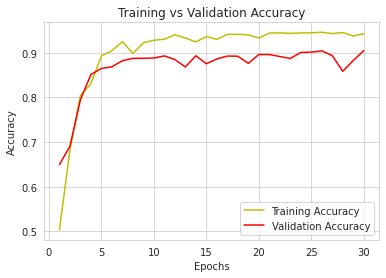

In [290]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,acc,'y',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Conclusion

+ I've used a Bidirectional LSTM with 32 activation units ( as it is bidirectional , 64 units are present)
+ Input layer dropout has been set to 0.2 so as to retain much of the information
+ Added an additional LSTM layer with 16 activation units.
+ But after this LSTM , drop out of 0.5 is used ( a much higher value ) as to avoid overfitting on the data
+ A dense layer (i.e. Fully Connected layer) has been used with 32 activaition units with Relu activiation
+ An additional Dense layer with softmax activation has been used 
+ Instead of RmsProp, Adam Optimizer has been used.
+ __Although the test accuracy is 90.49, not that much of an increase to prior model, but the loss in training is comparably lower.__
+ From the plot( Training vs Validation accuracy) above , we can conclude that the model has converged.

## Trying different LSTM Archtecture 

In [24]:
#2 layers of LSTM with 128 and 64 layers
model = Sequential()
model.add(LSTM (128,return_sequences=True,input_shape=(timesteps,input_dim)))
model.add(Dropout(0.2)) #just to retain much of the input information
model.add(LSTM(64))
model.add(Dropout(0.4))
model.add(Dense(n_classes,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 120,454
Trainable params: 120,454
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='categorical_crossentropy')

In [26]:
model.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test,Y_test),epochs=30)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 67s 9ms/step - loss: 1.0709 - accuracy: 0.5343 - val_loss: 1.0860 - val_accuracy: 0.5684
Epoch 2/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.7976 - accuracy: 0.6206 - val_loss: 0.8016 - val_accuracy: 0.6247
Epoch 3/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.6733 - accuracy: 0.6897 - val_loss: 0.7283 - val_accuracy: 0.7587
Epoch 4/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.3631 - accuracy: 0.8687 - val_loss: 0.5240 - val_accuracy: 0.8422
Epoch 5/30
7352/7352 [==============================] - 69s 9ms/step - loss: 0.2288 - accuracy: 0.9221 - val_loss: 0.4030 - val_accuracy: 0.8968
Epoch 6/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.1832 - accuracy: 0.9338 - val_loss: 0.5095 - val_accuracy: 0.8833
Epoch 7/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.167

In [27]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 3s 881us/step


In [28]:
score

[0.3259988089709441, 0.935188353061676]

In [36]:
x = PrettyTable()

In [37]:
x.field_names = ['Model Name', 'Train Accuracy', "Test Accuracy","Dropout"]
x.add_row(["1 layer LSTM(32 activations)",94.50,89.31,"(0.5,)"])
x.add_row(["1 layer LSTM(16 activations)",94.07,87.8,"(0.2,0.4)"])
x.add_row(["2 layers Biderectional LSTM(32,16 activations)",94.21,90.50,"(0.2,0.5)"])
x.add_row(['2 layer LSTM(128,64)',95.57,93.52,"(0.2,0.4)"])

In [38]:
print(x)

+------------------------------------------------+----------------+---------------+-----------+
|                   Model Name                   | Train Accuracy | Test Accuracy |  Dropout  |
+------------------------------------------------+----------------+---------------+-----------+
|          1 layer LSTM(32 activations)          |      94.5      |     89.31     |   (0.5,)  |
|          1 layer LSTM(16 activations)          |     94.07      |      87.8     | (0.2,0.4) |
| 2 layers Biderectional LSTM(32,16 activations) |     94.21      |      90.5     | (0.2,0.5) |
|              2 layer LSTM(128,64)              |     95.57      |     93.52     | (0.2,0.4) |
+------------------------------------------------+----------------+---------------+-----------+


> So the LSTM model with more activations (128 and 64) seems to fit the data better than the other models.